In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
os.listdir(r'/Users/gowthammarrapu/Documents/untitled folder 2/Datasets')

['other-Lyft_B02510.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-janjune-15.csv',
 'other-American_B01362.csv',
 'uber-raw-data-apr14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-Highclass_B01717.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv',
 'other-Diplo_B01196.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-may14.csv',
 'other-Prestige_B01338.csv']

In [4]:
uber_15 = pd.read_csv(r'/Users/gowthammarrapu/Documents/untitled folder 2/Datasets/uber-raw-data-janjune-15_sample.csv')

In [5]:
uber_15.shape

(100000, 4)

In [6]:
uber_15.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1118
locationID                 0
dtype: int64

In [7]:
uber_15.duplicated().sum()

54

In [8]:
uber_15.drop_duplicates(inplace=True)


In [9]:
uber_15.duplicated().sum()

0

In [10]:
uber_15.shape

(99946, 4)

In [11]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [12]:
uber_15.head(2)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231


In [13]:
uber_15['Pickup_date'][0]

'2015-05-02 21:43:00'

In [14]:

type(uber_15['Pickup_date'][0])

str

In [15]:
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'])

In [16]:
uber_15['Pickup_date'].dtypes


dtype('<M8[ns]')

In [17]:
type(uber_15['Pickup_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

In [19]:
uber_15['month'] = uber_15['Pickup_date'].dt.month_name()

<AxesSubplot:>

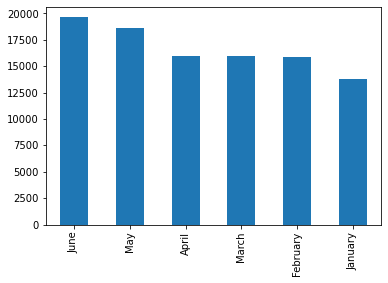

In [20]:
uber_15['month'].value_counts().plot(kind = 'bar')

In [21]:
uber_15['weekday'] = uber_15['Pickup_date'].dt.day_name()
uber_15['day'] = uber_15['Pickup_date'].dt.day
uber_15['hour'] = uber_15['Pickup_date'].dt.hour
uber_15['minute'] = uber_15['Pickup_date'].dt.minute

In [22]:
uber_15.head(3)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,20,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,19,20,26


In [23]:
pivort = pd.crosstab(index= uber_15['month'], columns = uber_15['weekday'])

In [24]:
pivort

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


<AxesSubplot:xlabel='month'>

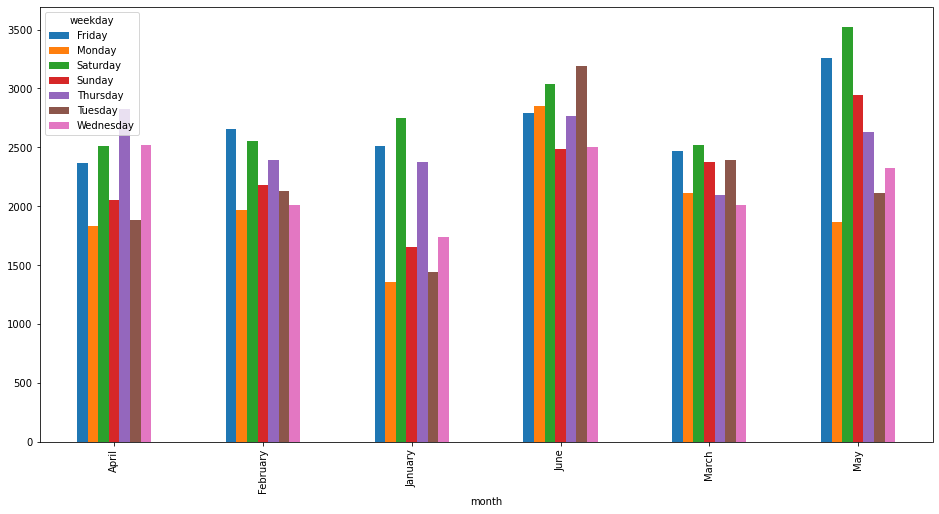

In [25]:
pivort.plot(kind='bar',figsize=(16,8))

In [26]:
summary = uber_15.groupby(['weekday', 'hour'], as_index=False).size()

<AxesSubplot:xlabel='hour', ylabel='size'>

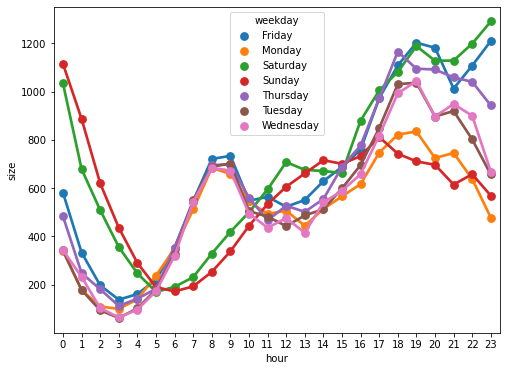

In [27]:
plt.figure(figsize=(8,6))
sns.pointplot(x= 'hour', y='size', hue='weekday' , data= summary)

In [29]:
import chart_studio.plotly as py
import plotly .graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode ,plot , iplot


In [30]:
init_notebook_mode(connected=True)

In [31]:
os.listdir(r'/Users/gowthammarrapu/Documents/untitled folder 2/Datasets')

['other-Lyft_B02510.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-janjune-15.csv',
 'other-American_B01362.csv',
 'uber-raw-data-apr14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-Highclass_B01717.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv',
 'other-Diplo_B01196.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-may14.csv',
 'other-Prestige_B01338.csv']

In [32]:
uber_foil = pd.read_csv(r'/Users/gowthammarrapu/Documents/untitled folder 2/Datasets/Uber-Jan-Feb-FOIL.csv')

In [33]:
uber_foil.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

In [34]:
px.box(x = 'dispatching_base_number', y = 'active_vehicles', data_frame = uber_foil)

In [35]:
files = os.listdir(r'/Users/gowthammarrapu/Documents/untitled folder 2/Datasets')[-13:]

In [36]:
files 

['uber-raw-data-apr14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-Highclass_B01717.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv',
 'other-Diplo_B01196.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-may14.csv',
 'other-Prestige_B01338.csv']

In [37]:
files.remove('Uber-Jan-Feb-FOIL.csv')

In [38]:
files.remove('other-Highclass_B01717.csv')

In [39]:
files.remove('other-Federal_02216.csv')

In [40]:
files.remove('other-Carmel_B00256.csv')
             

In [41]:

files.remove('other-Diplo_B01196.csv')

In [42]:
files.remove('other-Dial7_B00887.csv')

In [43]:
files.remove('other-Prestige_B01338.csv')

In [44]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv']

In [45]:
final = pd.DataFrame()
path = r'/Users/gowthammarrapu/Documents/untitled folder 2/Datasets'

for file in files:
    current_df = pd.read_csv(path+'/'+file)
    final = pd.concat([current_df,final])

In [46]:
final

,Date/Time,Lat,Lon,Base
0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,5/1/2014 0:06:00,40.6965,-73.9715,B02512
2,5/1/2014 0:15:00,40.7464,-73.9838,B02512
3,5/1/2014 0:17:00,40.7463,-74.0011,B02512
4,5/1/2014 0:17:00,40.7594,-73.9734,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


In [47]:
final.shape

(4534327, 4)

In [48]:
final.duplicated().sum()

82581

In [49]:
final.drop_duplicates(inplace=True)

In [50]:
final.duplicated().sum()

0

In [51]:
final.shape

(4451746, 4)

In [52]:

rush_uber = final.groupby(['Lat', 'Lon'], as_index=False).size()

In [53]:
rush_uber

,Lat,Lon,size
0,39.6569,-74.2258,1
1,39.6686,-74.1607,1
2,39.7214,-74.2446,1
3,39.8416,-74.1512,1
4,39.9055,-74.0791,1
...,...,...,...
574553,41.3730,-72.9237,1
574554,41.3737,-73.7988,1
574555,41.5016,-72.8987,1
574556,41.5276,-72.7734,1


In [55]:
import folium

In [56]:
basemap = folium.Map()

In [78]:
#basemap

In [58]:
from folium.plugins import HeatMap

In [59]:
HeatMap(rush_uber).add_to(basemap)

In [79]:
#basemap

In [61]:
final.head(3)

,Date/Time,Lat,Lon,Base
0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,5/1/2014 0:06:00,40.6965,-73.9715,B02512
2,5/1/2014 0:15:00,40.7464,-73.9838,B02512


In [62]:
final.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [63]:
final['Date/Time'][0]

0    5/1/2014 0:02:00
0    6/1/2014 0:00:00
0    7/1/2014 0:03:00
0    9/1/2014 0:01:00
0    8/1/2014 0:03:00
0    4/1/2014 0:11:00
Name: Date/Time, dtype: object

In [64]:
final['Date/Time'] = pd.to_datetime(final['Date/Time'], format="%m/%d/%Y %H:%M:%S")

In [65]:
final['Date/Time'].dtypes

dtype('<M8[ns]')

In [66]:
final['day'] = final['Date/Time'].dt.day
final['hour'] = final['Date/Time'].dt.hour

In [67]:
pivortt = final.groupby(['day', 'hour']).size().unstack()

In [69]:
pivortt

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,...,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,...,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,...,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,...,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,...,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,...,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,...,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,...,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,...,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


In [80]:
pivortt.style.background_gradient()

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,4607,4729,4930,5794,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,4797,4975,5188,5695,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,4788,5065,5384,6093,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,4743,4975,5193,6175,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,5141,5011,5047,5690,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,4801,5174,5426,6258,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,4905,5166,5364,6214,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,5288,5350,5483,6318,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,5406,5443,5496,6419,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


# automation

In [71]:
def gen_pivort_table(df,col1,col2):
    pivortt = final.groupby(['day', 'hour']).size().unstack()
    return pivortt.style.background_gradient()  

In [72]:
gen_pivort_table(final,'day','hour')

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,4607,4729,4930,5794,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,4797,4975,5188,5695,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,4788,5065,5384,6093,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,4743,4975,5193,6175,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,5141,5011,5047,5690,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,4801,5174,5426,6258,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,4905,5166,5364,6214,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,5288,5350,5483,6318,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,5406,5443,5496,6419,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


In [73]:
final.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'day', 'hour'], dtype='object')

In [74]:
pivortt

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,...,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,...,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,...,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,...,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,...,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,...,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,...,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,...,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,...,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


In [75]:
final

,Date/Time,Lat,Lon,Base,day,hour
0,2014-05-01 00:02:00,40.7521,-73.9914,B02512,1,0
1,2014-05-01 00:06:00,40.6965,-73.9715,B02512,1,0
2,2014-05-01 00:15:00,40.7464,-73.9838,B02512,1,0
3,2014-05-01 00:17:00,40.7463,-74.0011,B02512,1,0
4,2014-05-01 00:17:00,40.7594,-73.9734,B02512,1,0
...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,23
